In [27]:
import pandas as pd
from sympy import *
from sympy.plotting import plot3d
from math import log
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

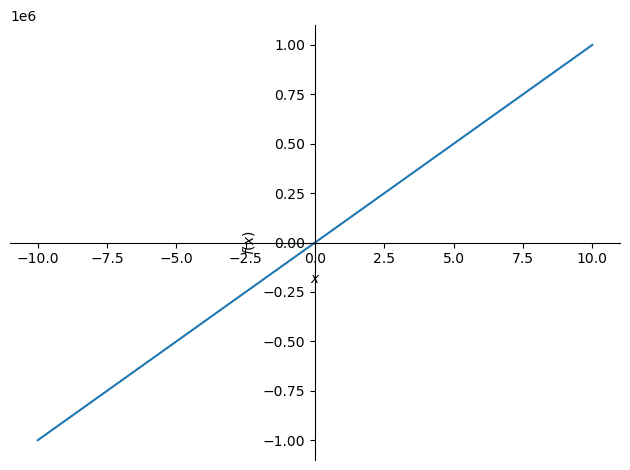

In [2]:
x = symbols('x')
m = 100000
b = 0
f = m*x + b
plot(f)

In [3]:
# Import points
points = pd.read_csv("https://bit.ly/2KF29Bd").itertuples()
data = pd.read_csv("https://bit.ly/2KF29Bd")

# Create a list from itertuples to support repeated iteration
points = list(points)

In [4]:
for i in points:
    print(i)

Pandas(Index=0, x=1, y=5)
Pandas(Index=1, x=2, y=10)
Pandas(Index=2, x=3, y=10)
Pandas(Index=3, x=4, y=15)
Pandas(Index=4, x=5, y=14)
Pandas(Index=5, x=6, y=15)
Pandas(Index=6, x=7, y=19)
Pandas(Index=7, x=8, y=18)
Pandas(Index=8, x=9, y=25)
Pandas(Index=9, x=10, y=23)


In [5]:
print(data)

    x   y
0   1   5
1   2  10
2   3  10
3   4  15
4   5  14
5   6  15
6   7  19
7   8  18
8   9  25
9  10  23


In [6]:
print(data.loc[5])

x     6
y    15
Name: 5, dtype: int64


In [7]:
# Test with a given line
m = 1.93939
b = 4.73333
sum_of_squares = 0.0

In [8]:
# calculate sum of squares
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual_squared = (y_predict - y_actual) **2
    sum_of_squares += residual_squared

print("sum of squares = {}".format(sum_of_squares))
# sum of squares = 28.096969704500005

sum of squares = 28.096969704500005


In [9]:
def sum_of_squares(my_data, slope, rise):
    sum_of_squares = 0.0
    for p in my_data:
        y_actual = p.y
        y_predict = slope * p.x + rise
        residual_squared = (y_predict - y_actual) **2
        #print(residual_squared)
        sum_of_squares += residual_squared
    return sum_of_squares

In [10]:
print(sum_of_squares(points, 1.94, 4.6))

28.265999999999977


## working with Linear regression from Skikit learn library

In [11]:
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")
df.head()

,x,y
0,1,5
1,2,10
2,3,10
3,4,15
4,5,14


In [12]:
# Extract input variables (all rows, all columns but last column)
x = df.values[:, :-1]
# Extract output column (all rows, last column)
y = df.values[:, -1]
# Fit a line to the points
fit = LinearRegression().fit(x, y)

In [13]:
m = fit.coef_.flatten() # need to call flatten function, so it does;nt return multidem array
b = fit.intercept_.flatten()
print("m = {0}".format(m)) 
print("b = {0}".format(b))

m = [1.93939394]
b = [4.73333333]


<Axes: xlabel='x', ylabel='y'>

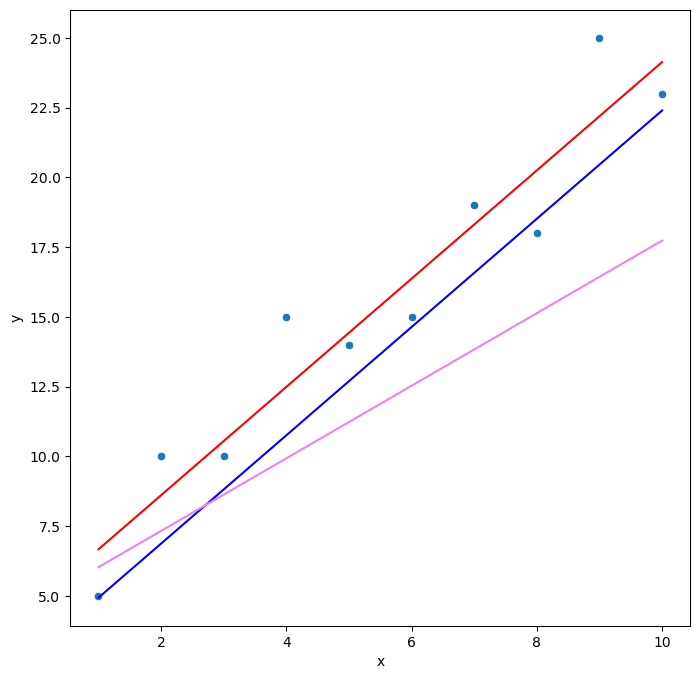

In [14]:
plt.figure(figsize=(8,8))
plt.plot(x, m*x + b, color="red") # line
plt.plot(x, m*x + 3, color="blue") # line
plt.plot(x, 1.3*x + b, color="violet") # line
sns.scatterplot(x=df['x'], y=df['y'], data = df)

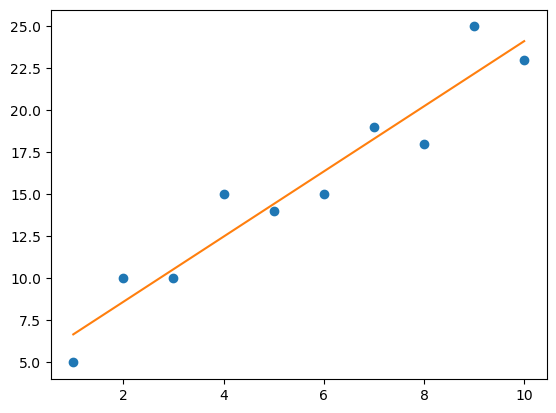

In [15]:
plt.plot(x, y, 'o') # scatterplot
plt.plot(x, m*x + b) # line
plt.show()

### Multiple linear regression

In [16]:
#y = b0 + b1*x1 + b2*x2

In [17]:
# Load the data
df = pd.read_csv('https://bit.ly/2X1HWH7', delimiter=",")
df.head()

,x1,x2,y
0,0,22,88
1,1,13,62
2,1,15,67
3,1,14,62
4,2,18,77


In [18]:
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]
# Extract output column (all rows, last column) \a
Y = df.values[:, -1]

In [19]:
# Training
fit = LinearRegression(). fit(X, Y)
# Print coefficientsa
print("Coefficients = {0}".format(fit.coef_))
print("Intercept = {0}".format(fit.intercept_))

Coefficients = [2.00672647 3.00203798]
Intercept = 20.109432820035963


In [20]:
print("y={0} + {1}x1 + {2}x2".format(fit.intercept_, fit.coef_[0], fit.coef_[1]))

y=20.109432820035963 + 2.006726472512807x1 + 3.0020379766466925x2


In [21]:
count = 0
for i in df.itertuples():
    if count < 10:
        print(i.x1)
    else: break
    count+=1

0
1
1
1
2
2
2
3
3
4


continue from "004. Fitting a Linear Regression" 1:48

In [22]:
# Load the data
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())
n = len(points)
m = (n*sum(p.x*p.y for p in points) - sum(p.x for p in points) *
     sum(p.y for p in points)) / (n*sum(p.x**2 for p in points) -
                                  sum(p.x for p in points) **2)
b = (sum(p.y for p in points) / n) - m * sum(p.x for p in points) / n
print(m, b)
# 1.9393939393939394 4.7333333333333325

1.9393939393939394 4.7333333333333325


## Inverse Matrix technique

b = (X^T * X)^(-1) * X^T * y

In [23]:
from numpy.linalg import inv
# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")
df.head()

,x,y
0,1,5
1,2,10
2,3,10
3,4,15
4,5,14


In [36]:
x_0 = df.values[:, :-1]
x_0

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [29]:
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1].flatten()
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [37]:
x_111 = np.vstack([X, np.ones(len(X))])
x_111

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [28]:
# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).T
print(X_1)

[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]
 [10.  1.]]


In [38]:
X_1.transpose()

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [30]:
# Extract output column (all rows, last column)
Y = df.values[:, -1]
Y

array([ 5, 10, 10, 15, 14, 15, 19, 18, 25, 23])

In [39]:
# Calculate coefficents for slope and intercept
b = inv(X_1.transpose() @ X_1 ) @ ( X_1.transpose() @ Y )
print(b) 

[1.93939394 4.73333333]


In [40]:
# Predict against the Y valies
y_predict = X_1.dot(b)
print(y_predict)

[ 6.67272727  8.61212121 10.55151515 12.49090909 14.43030303 16.36969697
 18.30909091 20.24848485 22.18787879 24.12727273]


In [41]:
print(y)

[ 5 10 10 15 14 15 19 18 25 23]


In [44]:
df_new = pd.DataFrame({
    'y_actual': y,
    'y_predicted': y_predict
})

In [45]:
df_new

,y_actual,y_predicted
0,5,6.672727
1,10,8.612121
2,10,10.551515
3,15,12.490909
4,14,14.430303
5,15,16.369697
6,19,18.309091
7,18,20.248485
8,25,22.187879
9,23,24.127273


In [46]:
df_new['delta'] = df_new['y_actual'] - df_new['y_predicted']
df_new

,y_actual,y_predicted,delta
0,5,6.672727,-1.672727
1,10,8.612121,1.387879
2,10,10.551515,-0.551515
3,15,12.490909,2.509091
4,14,14.430303,-0.430303
5,15,16.369697,-1.369697
6,19,18.309091,0.690909
7,18,20.248485,-2.248485
8,25,22.187879,2.812121
9,23,24.127273,-1.127273


## QR Decomposition Technique

A more computationally stable method is to use QR Decomposition.

Use NumPy's qr () function to break up a matrix into Q and R components.

Plug it into this formula to get the vector b containing the slope(s) and intercept.

X =Q•R

b = R^(-1) * Q^T * y

In [52]:
from numpy.linalg import qr, inv
# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]. flatten()
# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).transpose()
# Extract output column (all rows, last column)
Y = df.values[:, -1]

In [53]:
# calculate coefficents for slope and intercept
# using QR decomposition
Q, R = qr(X_1)
b = inv(R).dot(Q.transpose()).dot(Y)
print(b) # [1.93939394, 4.73333333]

[1.93939394 4.73333333]


## Hill Climbing
While the aforementioned techniques are best practice, "hill climbing" provides an interesting introduction to optimization.
We randomly adjust m and b by adding random values from a standard normal distribution.
On each random adjustment, if the sum of squares improves, we keep those adjustments to m and b, otherwise we revert them back.
We do this for a fixed number of iterations (enough to experience a diminishing return) and then we should have well-approximated m and b coefficients.

continue from "Hill Climbing" on 11:00

In [56]:
from numpy.random import normal 
import pandas as pd

# Import points from CSV
points = [p for p in pd.read_csv("https://bit.ly/2KF29Bd").itertuples()]
points

[Pandas(Index=0, x=1, y=5),
 Pandas(Index=1, x=2, y=10),
 Pandas(Index=2, x=3, y=10),
 Pandas(Index=3, x=4, y=15),
 Pandas(Index=4, x=5, y=14),
 Pandas(Index=5, x=6, y=15),
 Pandas(Index=6, x=7, y=19),
 Pandas(Index=7, x=8, y=18),
 Pandas(Index=8, x=9, y=25),
 Pandas(Index=9, x=10, y=23)]

In [62]:
# Building the model
m = 0.0
b = 0.0
# The number of iterations to perform
iterations = 150000
# Number of points
n = float(len(points))
# Initialize with a really large loss
# that we know will get replaced
best_loss = 10000000000000.0

for i in range(iterations):
    # Randomly adjust "m" and "b"
    m_adjust = normal(0,1)
    b_adjust = normal(0,1)
    m += m_adjust
    b += b_adjust
    # Calculate loss, which is total sum squared error
    new_loss = 0.0
    for p in points:
        new_loss += (p.y - (m * p.x + b)) **2 # If loss has improved, keep new values.# Otherwise revert.
    if new_loss < best_loss:
        print("y = {0}x + {1}". format(m, b))
        best_loss = new_loss
    else:
        m -= m_adjust
        b -= b_adjust

print("y = {0}x + {1}".format(m, b))
# RANDOM OUTCOME:
# у = 1.9371415770489468x + 4.740472482846922

y = -0.0957094424911202x + -0.40572115028044453
y = 0.4737624444625491x + -0.5811285720999007
y = 0.4484861548303706x + 1.1520205796160603
y = 1.4071039090996948x + 2.1116558252265376
y = 2.2143055134085854x + 1.9926836266204124
y = 2.0852963901920116x + 3.906947978291547
y = 1.9109213831492418x + 4.889847771336282
y = 1.9234223970416657x + 4.819725835987043
y = 1.9425818974714306x + 4.685998762970253
y = 1.9423182971058843x + 4.6892534102973595
y = 1.9324818841757334x + 4.753030598707928
y = 1.939701718759831x + 4.711421877412391
y = 1.9452820014229317x + 4.698451642481613
y = 1.9404561946040426x + 4.721784799459784
y = 1.940456194604022x + 4.721784799459789


In [71]:
for i in range(20):
    print(normal(0,1))

0.17240533479177308
0.9872915977426174
1.2906349040153604
0.4947327009658447
-0.185326262514141
-0.6472812605491804
0.5465397470360438
0.3807738203951059
-1.4800788864421452
-0.2439923760237565
1.4344350765697844
0.09400409372409624
-0.0498314314771093
0.4583874174505809
-0.1775881782937255
-1.375689303369975
-0.758254785424181
-2.338769958667265
2.705229358742943
0.5243905763626682


### Plotting Sum of Squares Loss Landscape

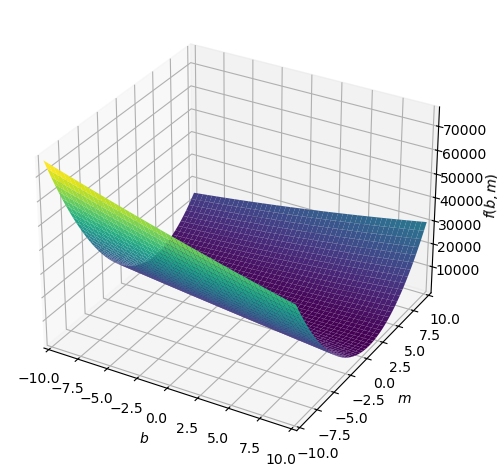

In [75]:
from sympy import * 
from sympy.plotting import plot3d 

points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)
sum_of_squares = Sum((m*x(i) + b - y (i)) ** 2, (i, 0, n)) \
.subs(n, len(points) - 1).doit() \
.replace(x, lambda i: points[i].x) \
.replace(y, lambda i: points[i].y)
plot3d (sum_of_squares)

### Partial Derivatives with SymPy

In [80]:
sum_of_squares = Sum((m*x(i) + b - y (i)) ** 2, (i, 0, n))

d_m = diff(sum_of_squares, m)
d_b = diff(sum_of_squares, b)
print(d_m)
print(d_b)

Sum(2*(b + m*x(i) - y(i))*x(i), (i, 0, n))
Sum(2*b + 2*m*x(i) - 2*y(i), (i, 0, n))


## Gradient Descent
For a simple linear regression fitting to y = mx + b

let's use the following sum of squares loss function. The derivative with respect to m and b.

To the right is the loss sum of squares landscape with respect to m and b for a simple linear regression.

In [ ]:
# Import points from CSV
points = [p for p in pd.read_csv("https://bit.ly/2KF29Bd").itertuples()]
points

In [81]:
# Building the model
m = 0.0
b = 0.0

# The number of iterations to perform
iterations = 100000

# Learning rate
L = .001

# count num of elements
n = float(len(points))
n

for i in range(iterations):
    # slope with respect to m
    D_m = sum ( 2 * p.x * ((m* p.x + b) - p.y ) for p in points)
    # slope with respect to b
    D_b = sum ( 2 * ((m * p.x + b) - p.y) for p in points)
    # update m and b
    m -= L*D_m
    b -= L*D_b

print("y = {}x + {}".format(m, b))

y = 1.9393939393939548x + 4.733333333333227


## 005. Overfitting, Variance, and RidgeLasso Regression

Overfitting means that our model works well with the data it was trained on but fails to predict correctly with new data.
- This can be due to many factors, but a common cause is the sampled data is too small, biased, or not representative of the population.
- The red "connect-the-dots" model has high variance, meaning its predictions are sensitive to outliers and therefore can vary greatly.
- The blue linear regression has high bias, meaning the model is less sensitive to outliers because it prioritizes a method (maintaining a straight line) rather than bend and respond to the data.

The red "connect-the-dots" model to the right is likely overfitted (high variance, low bias), but the blue linear regression line (low variance, high bias) is less likely to be overfit.

### Overfitting
Linear regression is a highly biased method and is resilient to overfitting.
When you hear someone say a regression "memorized" the data rather than generalizing it, they are talking about overfitting.
There are other remedies to mitigate overfitting, the most basic being separating training data and test data.

- The model is fit to the training data, and then is tested with the test data.
- If the test data performs poorly compared to the training data, there is a possibility of overfit (or just no correlation altogether).

<b>We will learn some techniques to assess a linear regression's performance on data it has not seen yet.</b>

## Ridge Regression (L2)

Sometimes we want to increase the bias of our model, so it is less sensitive to variance in the training data.

This can especially be the case when we do not have much data and are worried about overfitting.
    
This is where ridge regression can be used, which minimizes not just on the sum/mean of squares but also a penalty value that is introduced.

Notice to the right how we have trained our linear regression with the training data (red points) to the right.
But we are concerned with actual/testing data (blue points) which shows this linear regression is not predicting very well.
One thing we can do is increase the bias of our linear regression and make it less sensitive to the training data.

A ridge regression might adjust our linear regression as shown with the green line to the right.
This way it reduces the fit to our training data, increasing our bias and dropping our variance.
To implement our ridge regression, we modify our loss function as follows:

Loss = (Sum of squares) + Lambda × slope^2

If we have multiple independent variables, each one gets its own Lambda x slope^2 term.

This lambda x slope^2 is a penalty to the least squares which prevents overfitting.
The lambda is a parameter to define how severe our
penalty is (higher = less overfitting), and often
optimized based on cross validation.
When we execute training on our data, we will get a less overfit result.

In [86]:
import pandas as pd 
from sklearn.linear_model import Ridge, LinearRegression 
from sklearn.model_selection import KFold, cross_val_score

# Wine quality data
df = pd.read_csv ('https://bit.ly/39uuK7J', delimiter=",")
print(df)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  

In [91]:
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]
# Extract output column (all rows, last column)
Y = df.values[:, -1]
# Ridge regression with 1.0 penalty
model = Ridge(alpha=1.0)
fit = model.fit(X, Y)
# print coefficents
print(fit.coef_.flatten())
print(fit.intercept_.flatten())

[ 0.0134762  -1.10606693 -0.19832796  0.00754172 -1.34484932  0.00449295
 -0.00321945 -0.02068421 -0.43768992  0.81780861  0.29833937]
[4.16024211]


## Lasso Regression (L1)

Lasso regression is similar to ridge regression, except it takes the absolute values of the slope(s) rather than square them.
    
Loss = (Sum of squares) + Lambda × |slope|
    
If there are several independent variables, each variable gets its own Labmda x |slope|
    
Lasso regression is handy when you may have variables that create noise and are irrelevant, and it will exclude those useless variables.

In [97]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import KFold, cross_val_score

# Wine quality data
df = pd.read_csv('https://bit.ly/39uuK7J', delimiter=",")
#print(df)
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]
# Extract output column (all rows, last column)
Y = df.values[:, -1]
# Lasso regression with 0.1 penalty
model = Lasso(alpha=0.1)
fit = model.fit(X, Y)
# print coefficents
print(fit.coef_.flatten())
print(fit.intercept_.flatten())

[ 0.031408   -0.          0.          0.         -0.          0.00571672
 -0.00377281 -0.         -0.          0.          0.25583985]
[2.79266664]


## Train/Test Splits

## Training and Testing Data
A common practice to proactively prevent overfitting in machine learning is to separate training data and testing data.

- Training data is data used to fit a model and is typically 2/3 of the data.
- Test data is used to test the model and is the remaining 1/3 of the data.

By omitting the testing data from training, we see how well the model works on data it has not seen before and change our parameters accordingly.

In [98]:
import pandas as pd 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
df =pd.read_csv('https://bit.ly/3cIH97A',delimiter=',')

X = df.values[:, :-1] # df.values[all rows,all columns except last column]
Y = df.values[:, -1] # df.values[all rows,last column]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3)

model = LinearRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Squared Residual:",result)

Squared Residual: 0.993786654522558


### K-Fold validation

In [102]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import KFold, cross_val_score 
df =pd.read_csv('https://bit.ly/3cIH97A',delimiter=',')

X = df.values[:, :-1] # df.values[all rows,all columns except last column]
Y = df.values[:, -1] # df.values[all rows,last column]

# Perform a simple linear regression
kfold = KFold(n_splits = 3, random_state=3, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("MSE: mean=%.3f (stdev-%.3f)" % (results.mean(), results.std()))

[0.99447396 0.99177052 0.99315424]
MSE: mean=0.993 (stdev-0.001)


## Performance metrix

1. Mean Absolute Error
2. Mean Squared Error
3. Pearson correlation
4. R^2
5. P-value 

In [107]:
df.corr(method = 'pearson')

,x,y
x,1.000000,0.996665
y,0.996665,1.000000


##### **Calculating Correlation Coeffiecient**
---
<br>
\begin{equation}
r = \frac{n∑xy\,-\,(∑x)(∑y)}{{\sqrt{n∑x^2 \,-\,(∑x^2)}}{\sqrt{n∑x^2 \,-\,(∑x^2)}}}
\end{equation}